### K-Means Algorithm

---

In [3]:
import numpy as np

Points:
[1 2]
[2 3]
[9 4]
[10  1]
[5 8]
[7 5]
[6 4]
[4 2]
[4 9]

Clusters:
Cluster A:
[1 2]
[2 3]
Cluster B:
[5 8]
[7 5]
[4 9]
Cluster C:
[9 4]
[10  1]
[6 4]
[4 2]

Clusters:
Cluster A:
[1 2]
[2 3]
[4 2]
Cluster B:
[5 8]
[4 9]
Cluster C:
[9 4]
[10  1]
[7 5]
[6 4]

Clusters:
Cluster A:
[1 2]
[2 3]
[4 2]
Cluster B:
[5 8]
[4 9]
Cluster C:
[9 4]
[10  1]
[7 5]
[6 4]


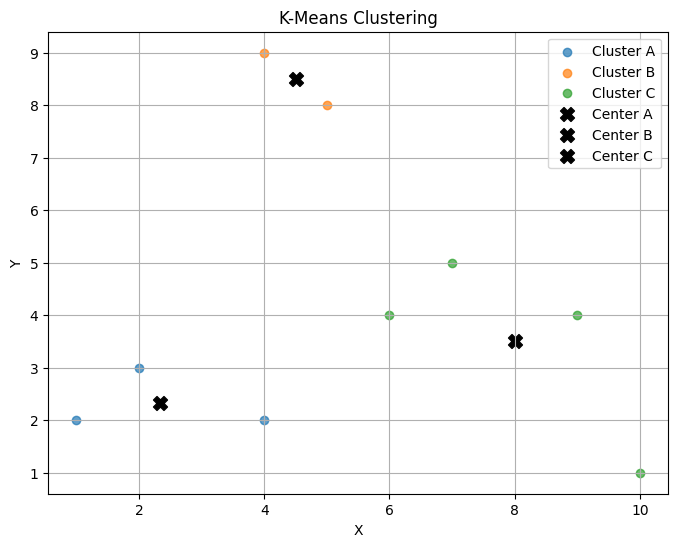

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Given points
points = np.array([[1, 2], [2, 3], [9, 4], [10, 1], [5, 8], [7, 5], [6, 4], [4, 2], [4, 9]])

# Print points
print("Points:")
for point in points:
    print(point)

# Initial cluster centers
centers = {
    'A': np.array([1, 2]),
    'B': np.array([5, 8]),
    'C': np.array([4, 2])
}

# Function to calculate Euclidean distance
def euclidean_distance(point1, point2):
    return np.linalg.norm(point1 - point2)

# K-Means algorithm
def k_means(points, centers, num_clusters=2, max_iterations=100):
    for _ in range(max_iterations):
        # Step 1: Assignment
        clusters = {key: [] for key in centers.keys()}
        for point in points:
            min_distance = float('inf')
            closest_center = None
            for center_type, center_point in centers.items():
                distance = euclidean_distance(point, center_point)
                if distance < min_distance:
                    min_distance = distance
                    closest_center = center_type
            clusters[closest_center].append(point)

        # Print clusters
        print("\nClusters:")
        for cluster_type, cluster_points in clusters.items():
            print(f"Cluster {cluster_type}:")
            for point in cluster_points:
                print(point)

        # Step 2: Update
        new_centers = {}
        for center_type, cluster_points in clusters.items():
            if len(cluster_points) > 0:
                new_centers[center_type] = np.mean(cluster_points, axis=0)
            else:
                new_centers[center_type] = centers[center_type]

        # Check for convergence
        if np.allclose(list(centers.values()), list(new_centers.values()), atol=1e-3):
            break

        centers = new_centers

    return centers, clusters

# Run K-Means algorithm
final_centers, final_clusters = k_means(points, centers)

# Visualization
plt.figure(figsize=(8, 6))

# Plot points
for center_type, center_point in final_clusters.items():
    cluster_points = np.array(center_point)
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {center_type}', alpha=0.7)

# Plot final cluster centers
for center_type, center_point in final_centers.items():
    plt.scatter(center_point[0], center_point[1], marker='X', s=100, label=f'Center {center_type}', c='black')

plt.title('K-Means Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()
